### 

## PIMA Indian Diabetes : Binary Prediction using Perceptron

### Preprocessing

#### Dataset Loading

For the below code, reference was taken
Reference : <br>
Option - 1 :Kaggle, Pima indians diabetes database, Viewed 12 September 2023,  <https://www.kaggle.com/uciml/pima-indians-diabetes-database>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pima = pd.read_csv("diabetes.csv")

#### Data Type for each Column(Attribute)

In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that all the attribute are of correct data type and does not warrant any type conversions

#### Histogram Representation for each attribute

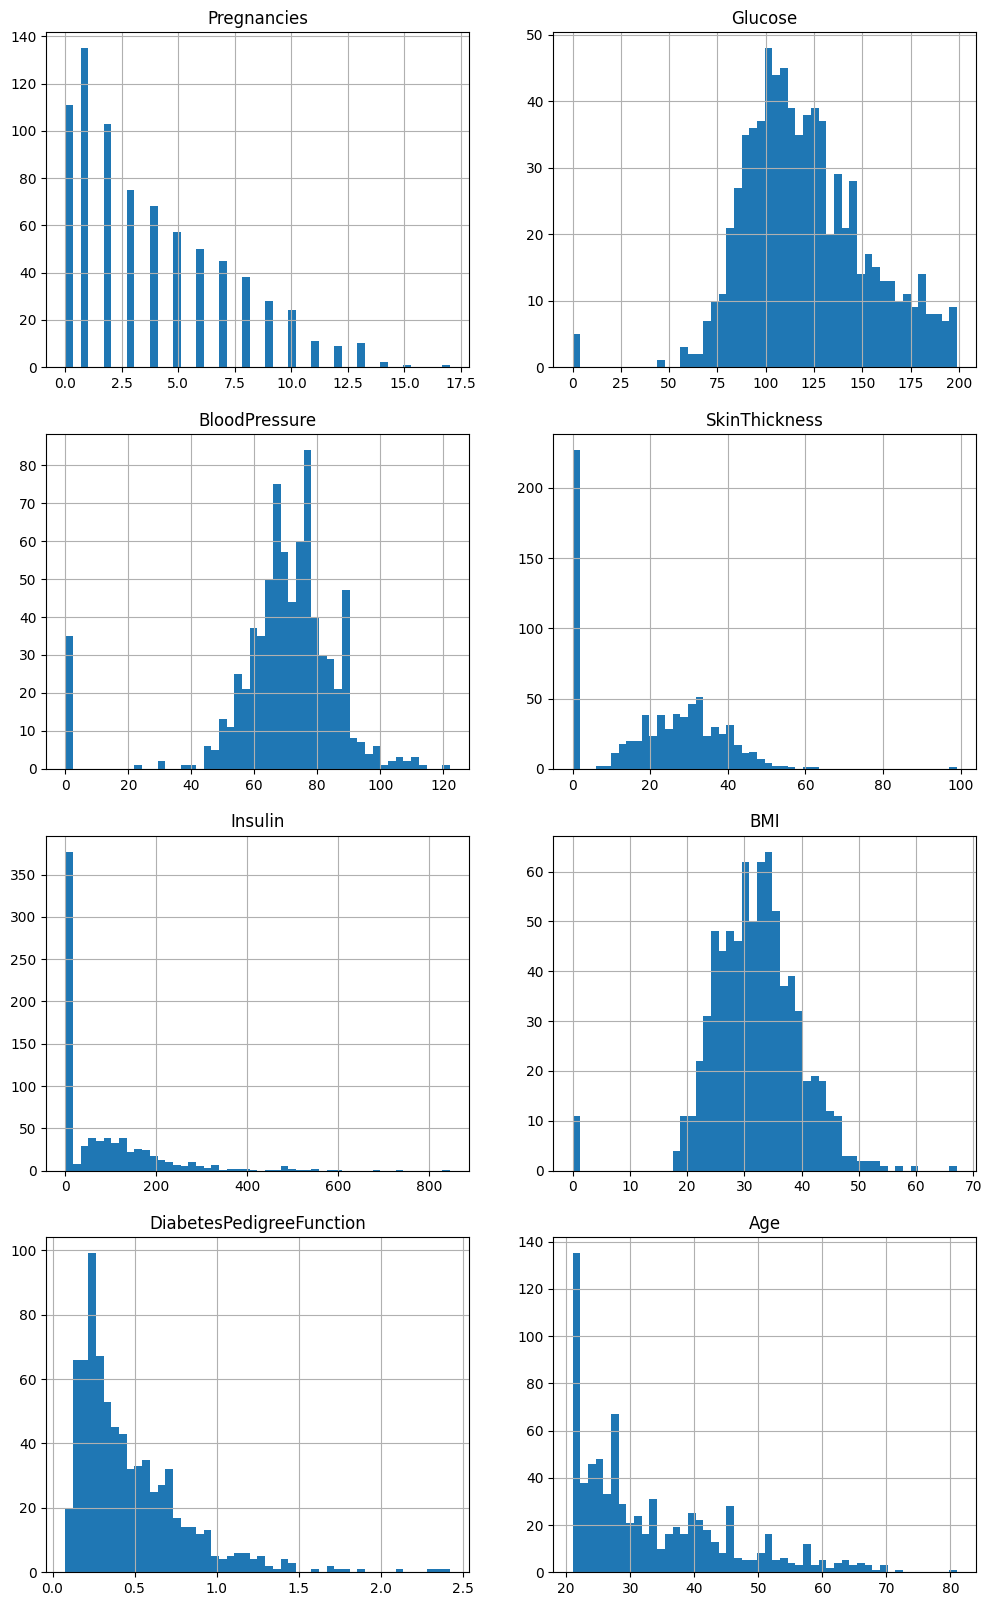

In [4]:
#3x3 version
# pima.hist(bins=50, figsize=(12, 8))
# plt.show()
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i * 2 + j
        axs[i, j].hist(pima.iloc[:, col], bins=50)
        axs[i, j].set_title(pima.columns[col])
        axs[i, j].grid(True)

plt.show()

We can observe some left skewness in the data, there appear to be some 0 values which might suggest outlliers but owing to context of dataset, removing them may result in loss of important information. So we rather process with standardization of the dataset

#### Attribute Description

In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Missing Values

In [6]:
print(np.sum(pima.isna()))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There appear to be no missing values.

In [7]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']

In [8]:
counts = y.value_counts()
print(counts)

0    500
1    268
Name: Outcome, dtype: int64


There appear to be imbalance in the outcome variable, but instead of balancing we proceed with evaluating the model in stratified  fold cross validation with shuffling, to ensure that this ratio remains

For the below code, reference was taken
Reference : <br>
Option - 1 : Vakharia K, 2021, *Diabetes Prediction(EDA+Classification Algo)*, Viewed 21 September 2023, <https://www.kaggle.com/code/kathanvakharia/diabetes-prediction-eda-classification-algo>
<br>
Option - 2 : Kaggle, Diabetes Prediction(EDA+Classification Algo), Viewed 21 September 2023,  <https://www.kaggle.com/code/kathanvakharia/diabetes-prediction-eda-classification-algo>
<br>
https://mediaproduction.adelaide.edu.au/referencing-guide/

In [36]:
#TODO  Need help with Citation

import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


#Helper functions to judge different classifiers
def disp_cm(y_test, y_pred)->float:
    """Displays the confusion matrix in the form of heatmap.
    
    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels
    
    Returns:
    acc_score (float): Accuracy score 
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score


def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant 
    classification report using `X_test` and `y_test`.
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.
    
    Returns:
    acc_score (float): Accuracy score 
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score



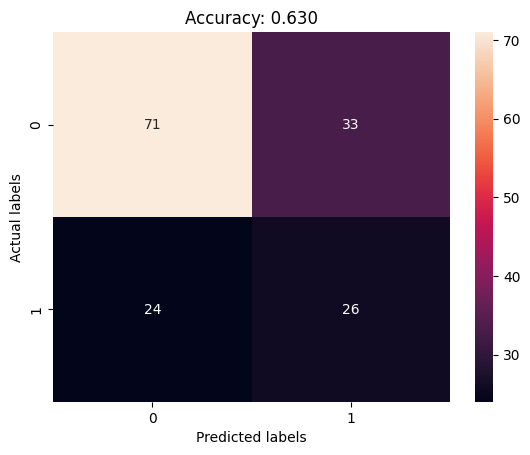

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       104
           1       0.44      0.52      0.48        50

    accuracy                           0.63       154
   macro avg       0.59      0.60      0.60       154
weighted avg       0.65      0.63      0.64       154



In [37]:
from sklearn.linear_model import Perceptron

#Perceptron classifier is a linear classifier (binary) that uses the following function for prediction:
#y = 1 if w*x + b > 0 else 0
#where w is the weight vector, x is the feature vector, and b is the bias.
#The perceptron is trained using stochastic gradient descent (SGD).
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

per_clf = Perceptron(random_state=524)
per_acc = judge_clf(per_clf)

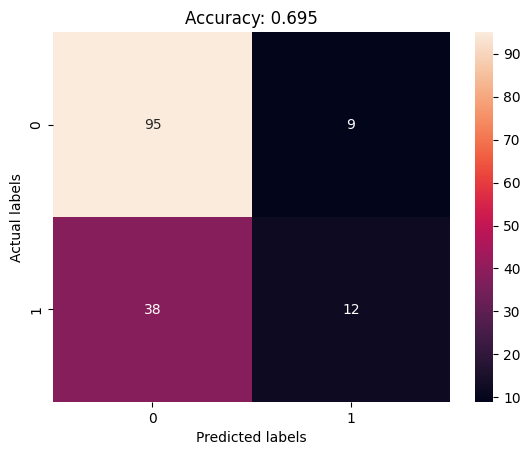

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       104
           1       0.57      0.24      0.34        50

    accuracy                           0.69       154
   macro avg       0.64      0.58      0.57       154
weighted avg       0.67      0.69      0.65       154



In [38]:
from sklearn.neural_network import MLPClassifier

#MLPClassifier is a multi-layer perceptron classifier that trains using Backpropagation.
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

mlp_clf = MLPClassifier(random_state=524)
mlp_acc = judge_clf(mlp_clf)

### Stratified K-Fold Cross Validation
#### Feature Scaling
All the input features are numerical values,<br> Standarization (Z-score normalization):

$$ x_i = \frac{(x_i−\mu_i)}{\sigma} $$
 
$ \mu = \text{Mean} $ <br>
$ \sigma = \text{Standard deviation} $

![Alt text](image.png)

We use the above depicted flowchart for our code, and analyse based on different learning rates and different activation function and optimizer

In [39]:
# #Initial Working Code : SLP 
# from sklearn.model_selection import StratifiedKFold
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from tensorflow import keras 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# import time
# from sklearn.metrics import roc_curve, roc_auc_score

# def train_and_evaluate(X, y, learning_rate):
#     """Trains and evaluates a model using 5-fold 
#     cross-validation. Plots the loss and accuracy curves

#     Parameters:
#     X (array-like): 2D-array of input features.
#     y (array-like): list of target features.
#     learning_rate (float): learning rate for SGD.

#     Returns:
#     None
#     """

#     n_splits = 5  # Number of folds
#     stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=524)
#     accuracy_scores = []
#     auc_scores = [] 
#     execution_times = []
#     # Create a new figure for the subplots
#     fig = plt.figure(figsize=(12, 36))
#     for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         sc = StandardScaler()
#         X_train = sc.fit_transform(X_train)
#         X_test = sc.transform(X_test)

#         model = Sequential()
#         model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
#         opt = keras.optimizers.SGD(learning_rate=learning_rate)
#         model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#         early_stop = EarlyStopping(monitor='val_loss', patience=5)
#         start_time = time.time()
#         history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)
#         end_time = time.time()

#         y_pred = model.predict(X_test)
#         fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#         auc_score = roc_auc_score(y_test, y_pred)
#         accuracy, acc_score = model.evaluate(X_test, y_test)
#         accuracy_scores.append(acc_score)
#         auc_scores.append(auc_score)
#         ax = fig.add_subplot(n_splits, 2, 2*i+1)

#         # Plot the loss and accuracy curves for the current fold
#         ax.plot(history.history['loss'], label='Training Loss')
#         ax.plot(history.history['val_loss'], label='Validation Loss')
#         ax.plot(history.history['accuracy'], label='Training Accuracy')
#         ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
#         ax.set_title(f'Fold {i+1}, Accuracy = {acc_score:.2%}')
#         ax.set_xlabel('Epoch')
#         ax.set_ylabel('Loss / Accuracy')
#         ax.legend()

#         ax = fig.add_subplot(n_splits, 2, 2*i+2)

#         # Plot the ROC curve for the current fold
#         ax.plot(fpr, tpr, label=f'AUC = {auc_score:.2%}')
#         ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
#         ax.set_title(f'Fold {i+1}, ROC Curve')
#         ax.set_xlabel('False Positive Rate')
#         ax.set_ylabel('True Positive Rate')
#         ax.legend()
#     # Adjust the spacing between the subplots
#     plt.tight_layout()

#     # Calculate and print the mean and standard deviation of accuracy scores
#     mean_accuracy = np.mean(accuracy_scores)
#     std_accuracy = np.std(accuracy_scores)
#     mean_auc = np.mean(auc_scores)
#     std_auc = np.std(auc_scores)
#     mean_execution_time = np.mean(execution_times)
#     std_execution_time = np.std(execution_times)
    
#     print(f"Mean Accuracy: {mean_accuracy:0.3f} +/- {std_accuracy:0.3f}")
#     print(f"Mean Execution Time: {mean_execution_time:.3f} +/- {std_execution_time:.3f} seconds")
#     print(f"Mean AUC: {mean_auc:0.3f} +/- {std_auc:0.3f}")

### Final Model : Matplotlib for Evaluation 

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


def train_and_evaluate(X, y, learning_rate):
    """Trains and evaluates a model using 5-fold 
    cross-validation. Plots the loss and accuracy curves
    and the ROC curves for all folds.

    Parameters:
    X (array-like): 2D-array of input features.
    y (array-like): list of target features.
    learning_rate (float): learning rate for SGD.

    Returns:
    mean_accuracy (float): mean accuracy score across all folds.
    mean_auc (float): mean AUC score across all folds.
    mean_execution_time (float): mean execution time across all folds.
    """

    n_splits = 5  # Number of folds
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=524)
    accuracy_scores = []
    auc_scores = [] 
    execution_times = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    colors = ['r', 'g', 'b', 'c', 'm']
    lines = ['-', '--', '-.', ':']
    
    for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        model = Sequential()
        model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

        opt_1 = keras.optimizers.SGD(learning_rate=learning_rate)
        opt_2 = keras.optimizers.Adam(learning_rate=learning_rate)
        
        model.compile(loss='binary_crossentropy', optimizer=opt_1, metrics=['accuracy']) # SGD
        # model.compile(loss='binary_crossentropy', optimizer=opt_2, metrics=['accuracy']) # Adam
        

        early_stop = EarlyStopping(monitor='val_loss', patience=5)
        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)
        end_time = time.time()

        y_pred = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        accuracy, acc_score = model.evaluate(X_test, y_test)
        accuracy_scores.append(acc_score)
        auc_scores.append(auc_score)
        execution_times.append(end_time - start_time)

        ax1.plot(history.history['loss'], linestyle=lines[0], color=colors[i])
        ax1.plot(history.history['val_loss'], linestyle=lines[1], color=colors[i])
        ax1.plot(history.history['accuracy'],  linestyle=lines[2], color=colors[i])
        ax1.plot(history.history['val_accuracy'], linestyle=lines[3], color=colors[i])

        ax2.plot(fpr, tpr, linestyle='-', color=colors[i])
        
    # Set the titles and labels for the subplots
    pa1 = Patch(facecolor=colors[0], edgecolor='black', label = "Fold 1")
    pa2 = Patch(facecolor=colors[1], edgecolor='black', label = "Fold 2")
    pa3 = Patch(facecolor=colors[2], edgecolor='black', label = "Fold 3")
    pa4 = Patch(facecolor=colors[3], edgecolor='black', label = "Fold 4")
    pa5 = Patch(facecolor=colors[4], edgecolor='black', label = "Fold 5")

    ax1.set_title('Loss and Accuracy Curves')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss / Accuracy')
    custom_lines = [Line2D([0], [0], linestyle='-', color='black'),
                Line2D([0], [0], linestyle='--', color='black'),
                Line2D([0], [0], linestyle='-.', color='black'),
                Line2D([0], [0], linestyle=':', color='black')]

    ax1.legend(custom_lines, ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy'], bbox_to_anchor=(0, 1.10, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
    ax2.set_title('ROC Curves')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(handles = [pa1, pa2, pa3, pa4, pa5], bbox_to_anchor=(0, 1.10, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
    # Calculate and print the mean and standard deviation of accuracy scores
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    mean_execution_time = np.mean(execution_times)
    std_execution_time = np.std(execution_times)
    mean_accuracy_ = mean_accuracy + std_accuracy
    print(f"Mean Accuracy: {mean_accuracy:0.3f} +/- {std_accuracy:0.3f}")
    print(f"Mean Execution Time: {mean_execution_time:.3f} +/- {std_execution_time:.3f} seconds")
    print(f"Mean AUC: {mean_auc:0.3f} +/- {std_auc:0.3f}")
    
    return mean_accuracy_, mean_auc, mean_execution_time

KeyboardInterrupt: 

### Using Tensorboard for Visualization

In [41]:
# from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# import datetime

# def train_and_evaluate(X, y, learning_rate):
#     """Trains and evaluates a model using 5-fold 
#     cross-validation. Plots the loss and accuracy curves
#     and the ROC curves for all folds.

#     Parameters:
#     X (array-like): 2D-array of input features.
#     y (array-like): list of target features.
#     learning_rate (float): learning rate for SGD.

#     Returns:
#     mean_accuracy (float): mean accuracy score across all folds.
#     mean_auc (float): mean AUC score across all folds.
#     mean_execution_time (float): mean execution time across all folds.
#     """

#     n_splits = 5  # Number of folds
#     stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=524)
#     accuracy_scores = []
#     auc_scores = [] 
#     execution_times = []
#     log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#     tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
#     for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         sc = StandardScaler()
#         X_train = sc.fit_transform(X_train)
#         X_test = sc.transform(X_test)

#         model = Sequential()
#         model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
#         opt = keras.optimizers.SGD(learning_rate=learning_rate)
#         model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#         early_stop = EarlyStopping(monitor='val_loss', patience=2)
#         start_time = time.time()
#         history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, tensorboard_callback], verbose=0)
#         end_time = time.time()

#         y_pred = model.predict(X_test)
#         fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#         auc_score = roc_auc_score(y_test, y_pred)
#         accuracy, acc_score = model.evaluate(X_test, y_test)
#         accuracy_scores.append(acc_score)
#         auc_scores.append(auc_score)
#         execution_times.append(end_time - start_time)

#     # Calculate and print the mean and standard deviation of accuracy scores
#     mean_accuracy = np.mean(accuracy_scores)
#     std_accuracy = np.std(accuracy_scores)
#     mean_auc = np.mean(auc_scores)
#     std_auc = np.std(auc_scores)
#     mean_execution_time = np.mean(execution_times)
#     std_execution_time = np.std(execution_times)
    
#     print(f"Mean Accuracy: {mean_accuracy:0.3f} +/- {std_accuracy:0.3f}")
#     print(f"Mean Execution Time: {mean_execution_time:.3f} +/- {std_execution_time:.3f} seconds")
#     print(f"Mean AUC: {mean_auc:0.3f} +/- {std_auc:0.3f}")
    
#     return mean_accuracy, mean_auc, mean_execution_time

### Activation Function: Sigmoid
### Optimizer: Stochastic Gardient Descent
### Loss Function: Binary Cross-Entropy

5/5 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8301
Mean Accuracy: 0.768 +/- 0.038
Mean Execution Time: 20.321 +/- 5.688 seconds
Mean AUC: 0.825 +/- 0.043
5/5 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8301
Mean Accuracy: 0.771 +/- 0.034
Mean Execution Time: 11.670 +/- 1.775 seconds
Mean AUC: 0.831 +/- 0.040
5/5 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8301
Mean Accuracy: 0.773 +/- 0.032
Mean Execution Time: 3.604 +/- 0.824 seconds
Mean AUC: 0.829 +/- 0.040
5/5 [==============================] - 0s 4ms/step - loss: 0.4026 - accuracy: 0.8301
Mean Accuracy: 0.777 +/- 0.030
Mean Execution Time: 3.193 +/- 0.735 seconds
Mean AUC: 0.829 +/- 0.038
5/5 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8235
Mean Accuracy: 0.764 +/- 0.032
Mean Execution Time: 2.691 +/- 0.333 seconds
Mean AUC: 0.824 +/- 0.043
5/5 [==============================] - 0s 2ms/step - loss: 0.41

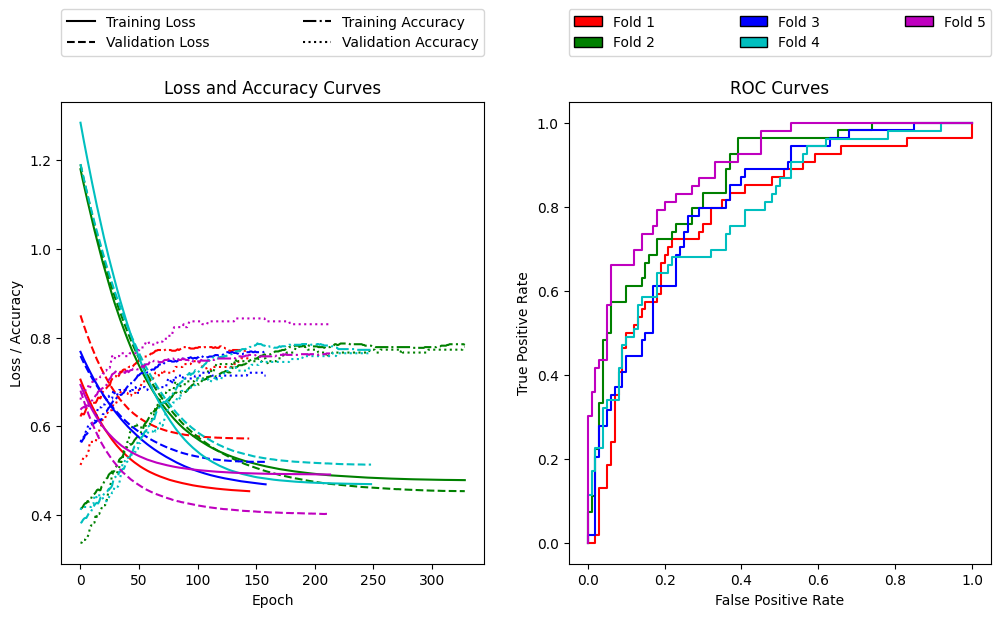

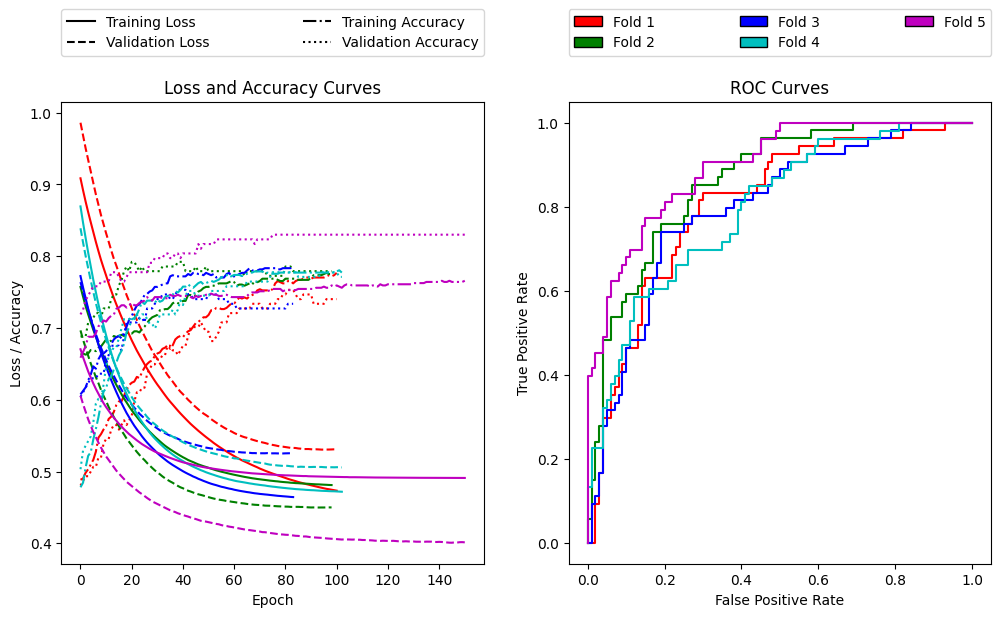

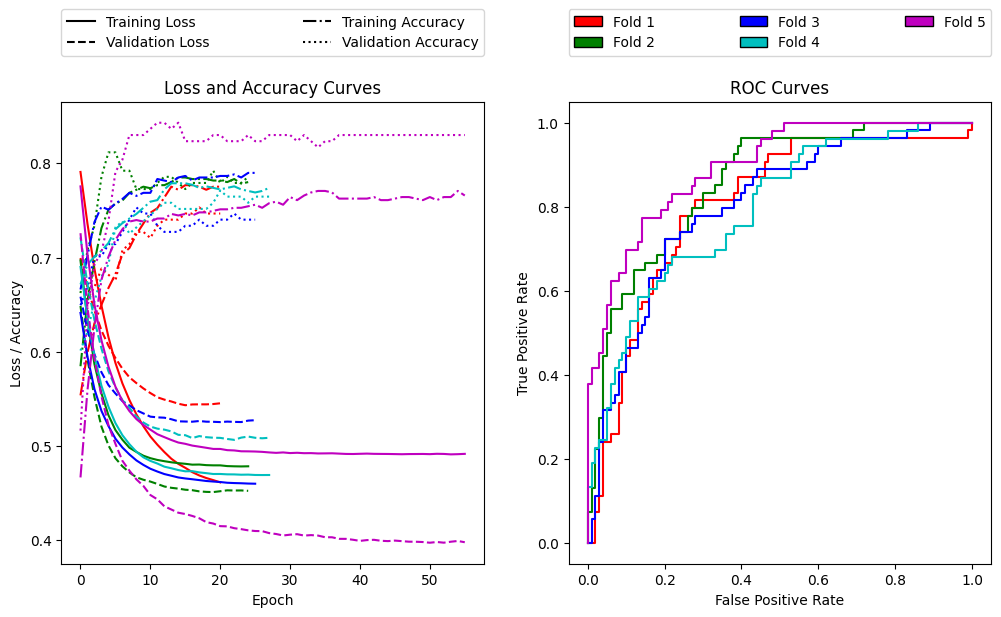

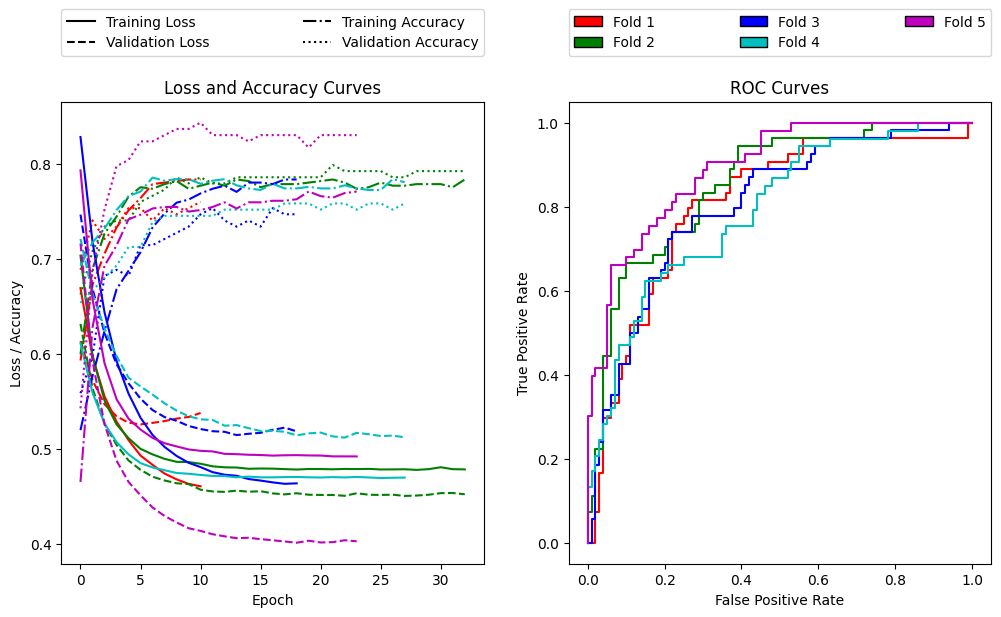

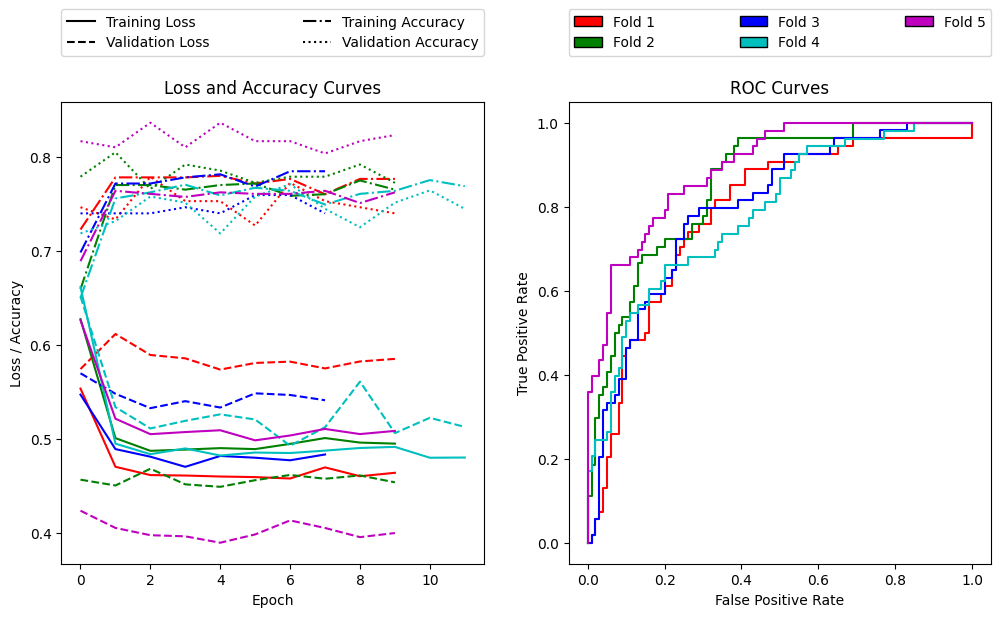

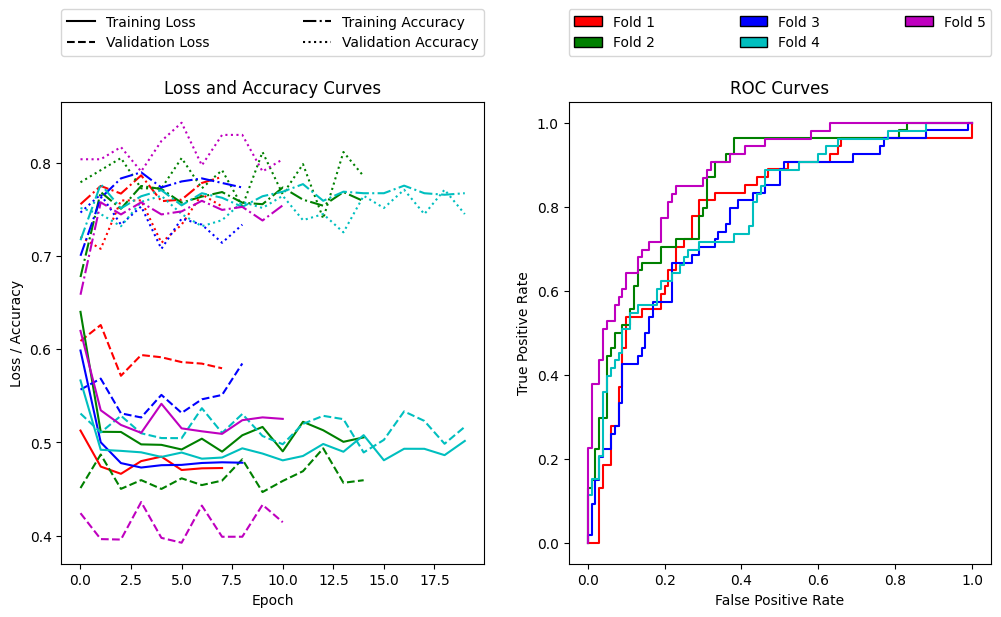

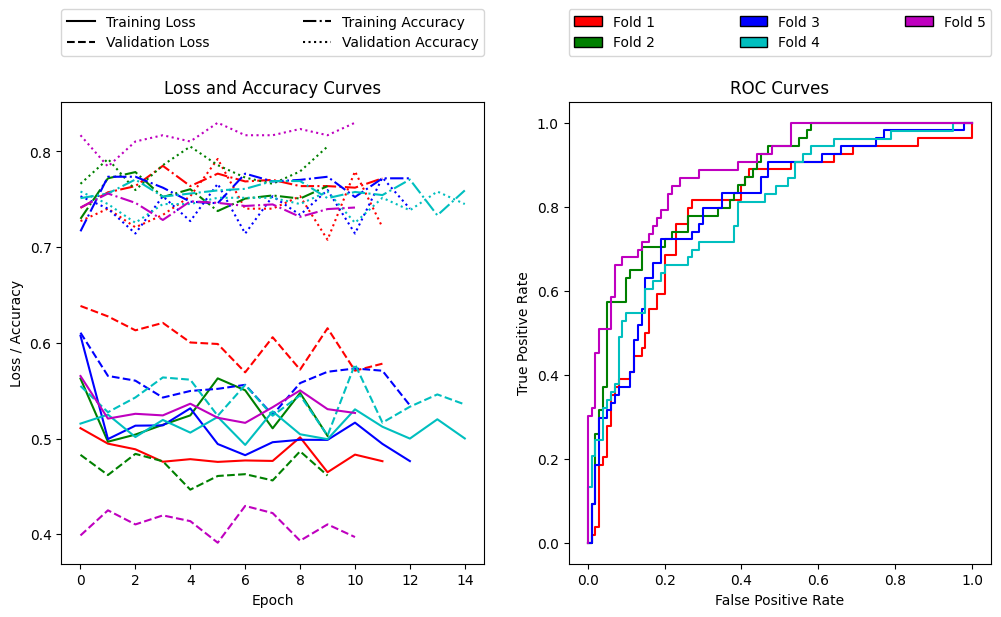

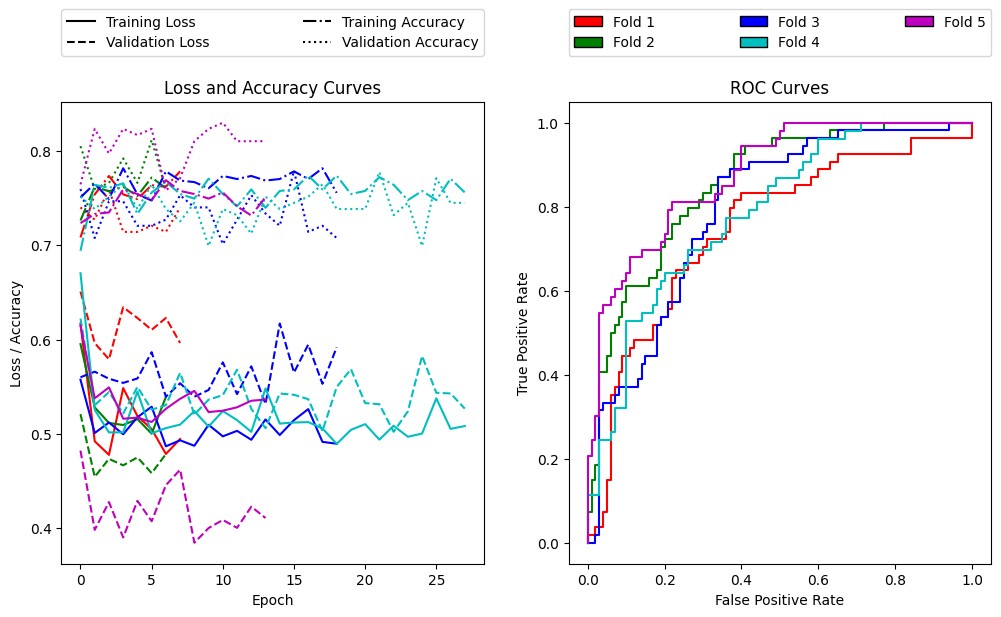

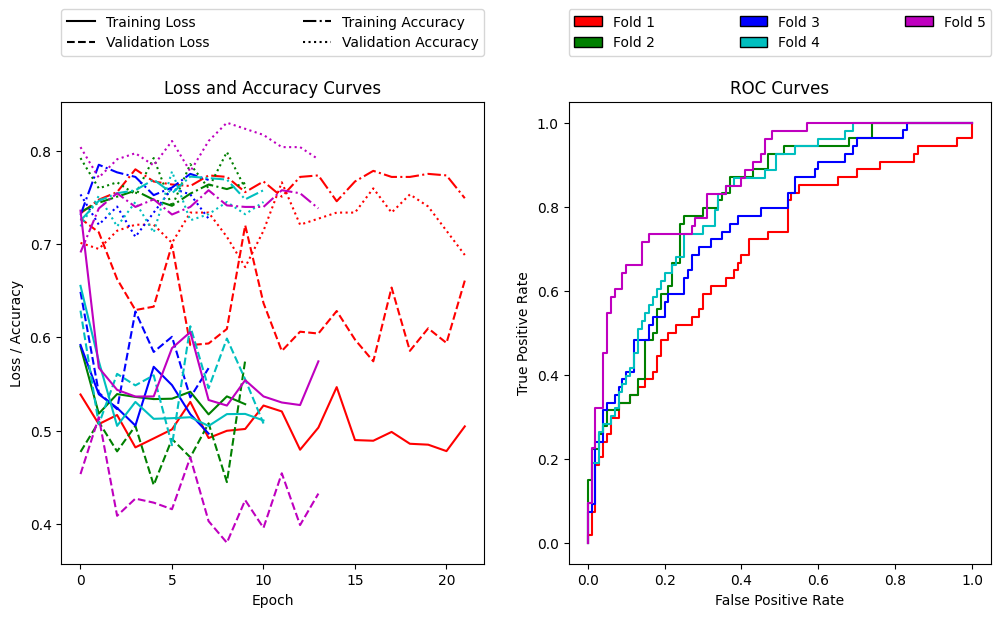

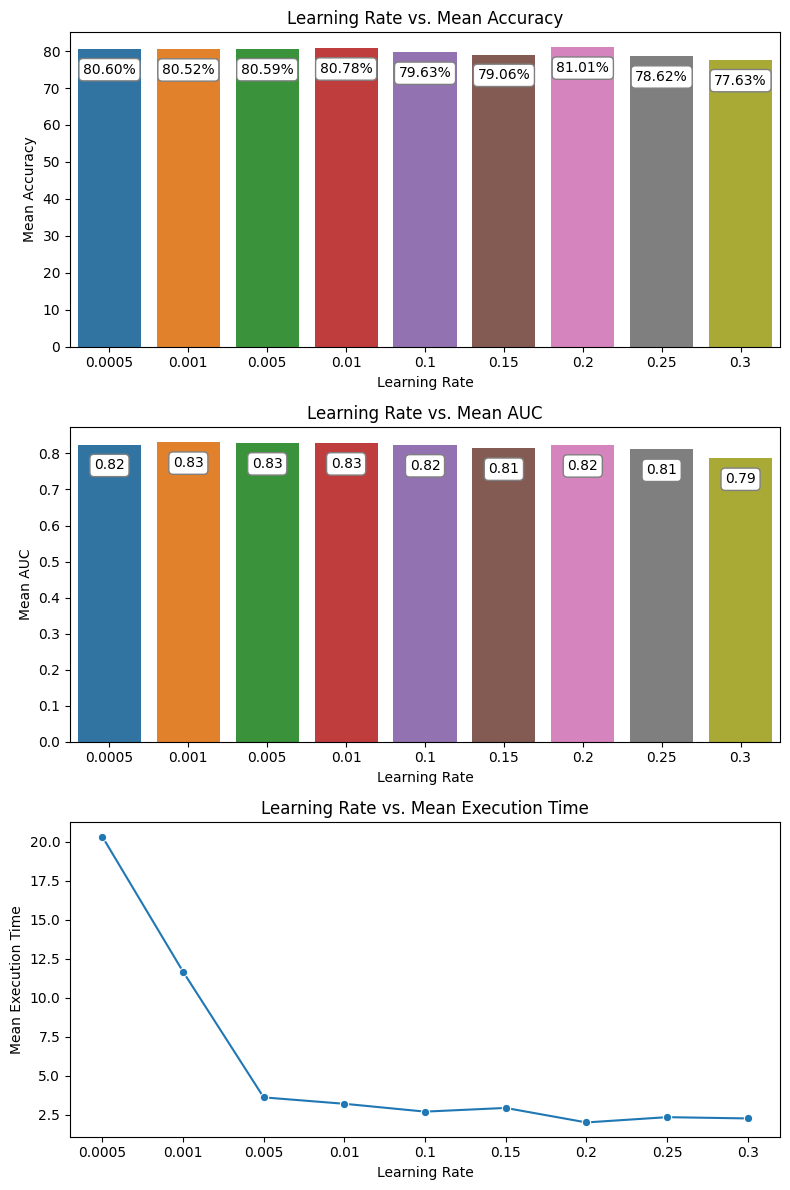

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3]
# learning_rates = [ 0.0005, 0.25, 0.3]

results = {'learning_rate': [], 'mean_accuracy': [], 'mean_auc': [], 'mean_execution_time': []}
for j in learning_rates:
    mean_accuracy, mean_auc, mean_execution_time = train_and_evaluate(X, y, learning_rate=j)
    results['learning_rate'].append(str(j))
    results['mean_accuracy'].append((mean_accuracy*100))
    results['mean_auc'].append(mean_auc)
    results['mean_execution_time'].append(mean_execution_time)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# 1st plot: Line plot for learning rate vs. mean accuracy
sns.barplot(x='learning_rate', y='mean_accuracy', data=results, ax=axs[0])
axs[0].set_xlabel('Learning Rate')
axs[0].set_ylabel('Mean Accuracy')
axs[0].set_title('Learning Rate vs. Mean Accuracy')

# Add accuracy values on top of the bars
for q in axs[0].patches:
    axs[0].annotate(format(q.get_height(), '.2f') + '%', 
                     (q.get_x() + q.get_width() / 2., q.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, -15), 
                     textcoords = 'offset points',
                     bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', linewidth=1))

# 2nd plot: Line plot for learning rate vs. mean AUC
sns.barplot(x='learning_rate', y='mean_auc', data=results, ax=axs[1])
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Mean AUC')
axs[1].set_title('Learning Rate vs. Mean AUC')
for q in axs[1].patches:
    axs[1].annotate(format(q.get_height(), '.2f'), 
                     (q.get_x() + q.get_width() / 2., q.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, -15), 
                     textcoords = 'offset points',
                     bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', linewidth=1))


# 3rd plot: Line plot for learning rate vs. mean execution time
sns.lineplot(x='learning_rate', y='mean_execution_time', data=results, marker='o', ax=axs[2])
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Mean Execution Time')
axs[2].set_title('Learning Rate vs. Mean Execution Time')


plt.tight_layout()
plt.show()

### Activation Function: Sigmoid
### Optimizer: Adam
### Loss Function: Binary Cross-Entropy

5/5 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8301
Mean Accuracy: 0.776 +/- 0.031
Mean Execution Time: 16.637 +/- 3.798 seconds
Mean AUC: 0.833 +/- 0.037
5/5 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8301
Mean Accuracy: 0.774 +/- 0.032
Mean Execution Time: 9.941 +/- 2.896 seconds
Mean AUC: 0.830 +/- 0.040
5/5 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8301
Mean Accuracy: 0.767 +/- 0.034
Mean Execution Time: 3.657 +/- 0.711 seconds
Mean AUC: 0.828 +/- 0.041
5/5 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8301
Mean Accuracy: 0.775 +/- 0.031
Mean Execution Time: 2.952 +/- 0.915 seconds
Mean AUC: 0.827 +/- 0.041
5/5 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8301
Mean Accuracy: 0.767 +/- 0.041
Mean Execution Time: 1.679 +/- 0.253 seconds
Mean AUC: 0.821 +/- 0.044
5/5 [==============================] - 0s 2ms/step - loss: 0.422

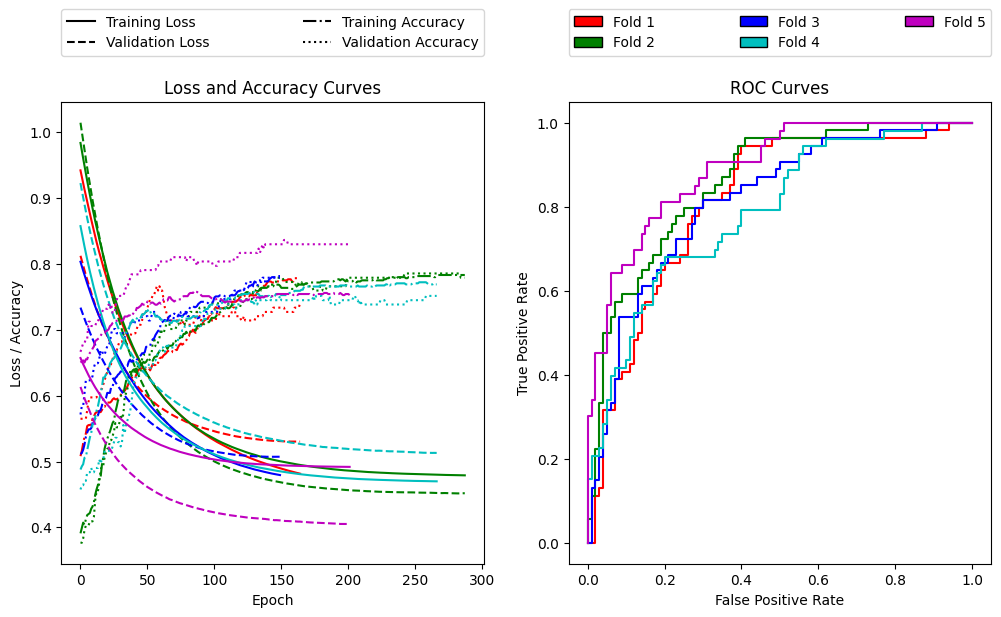

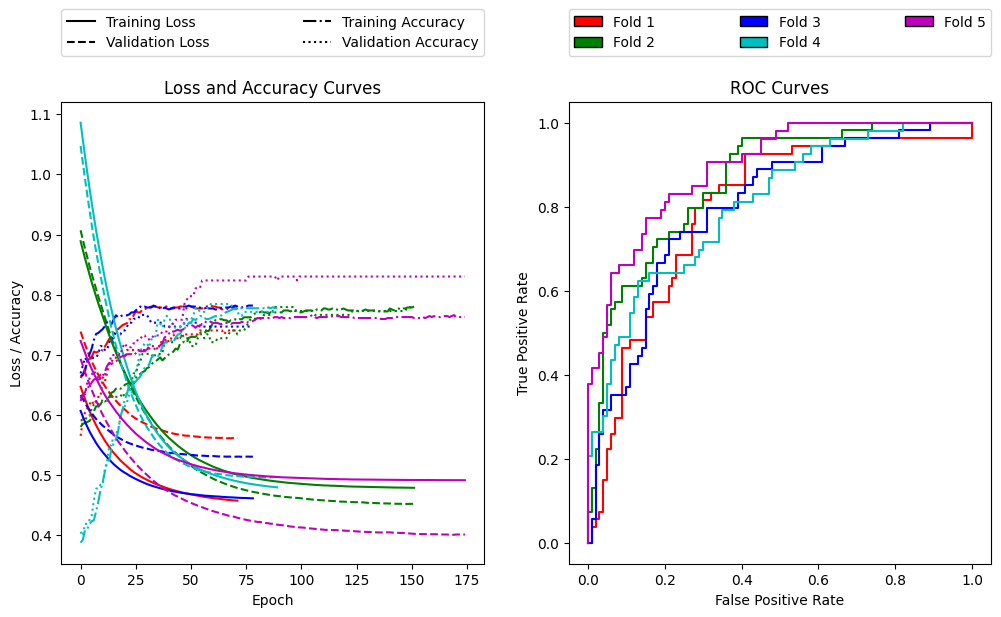

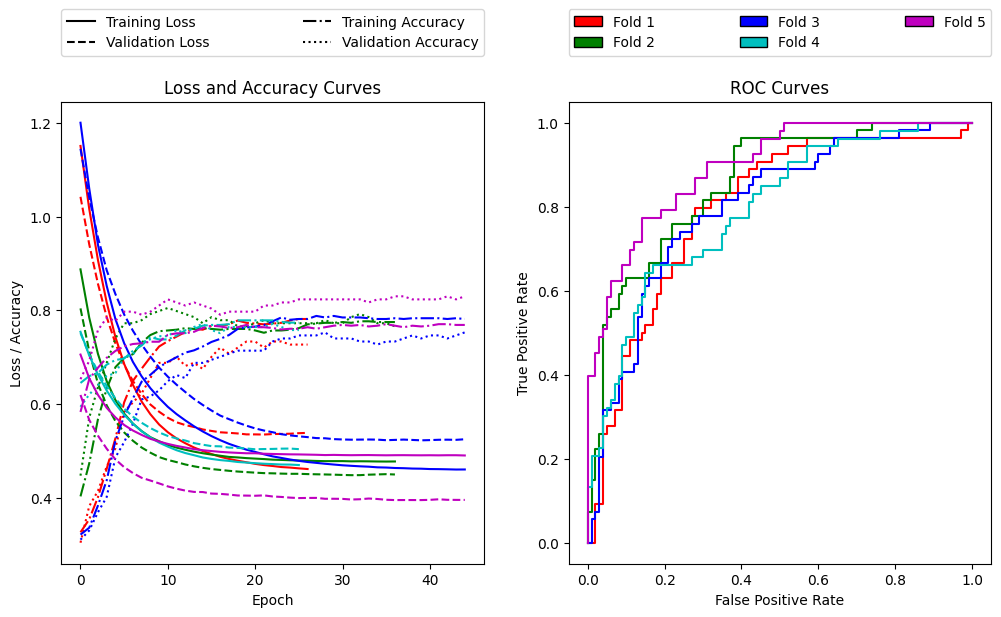

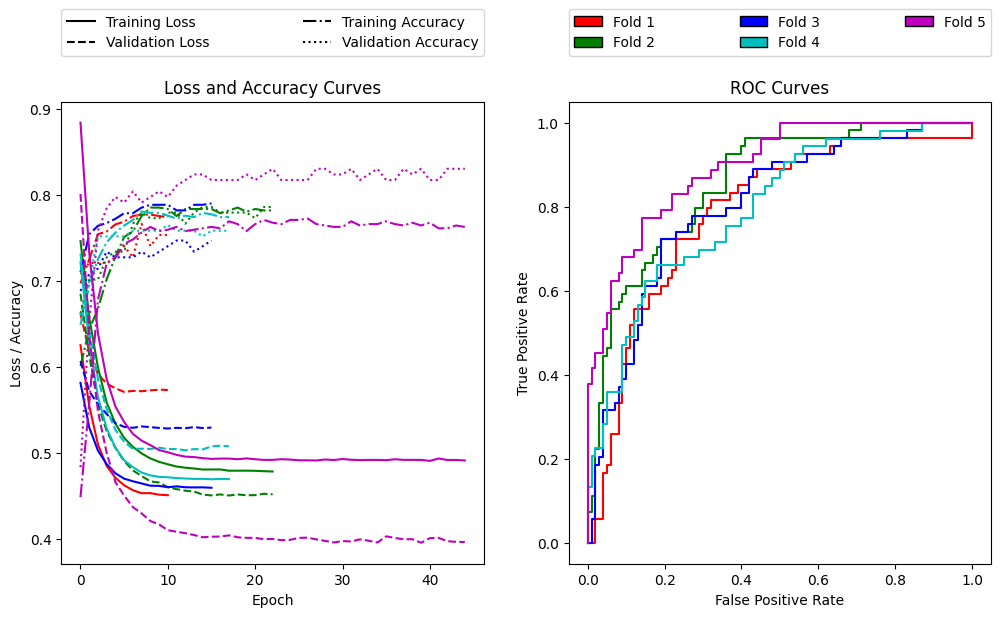

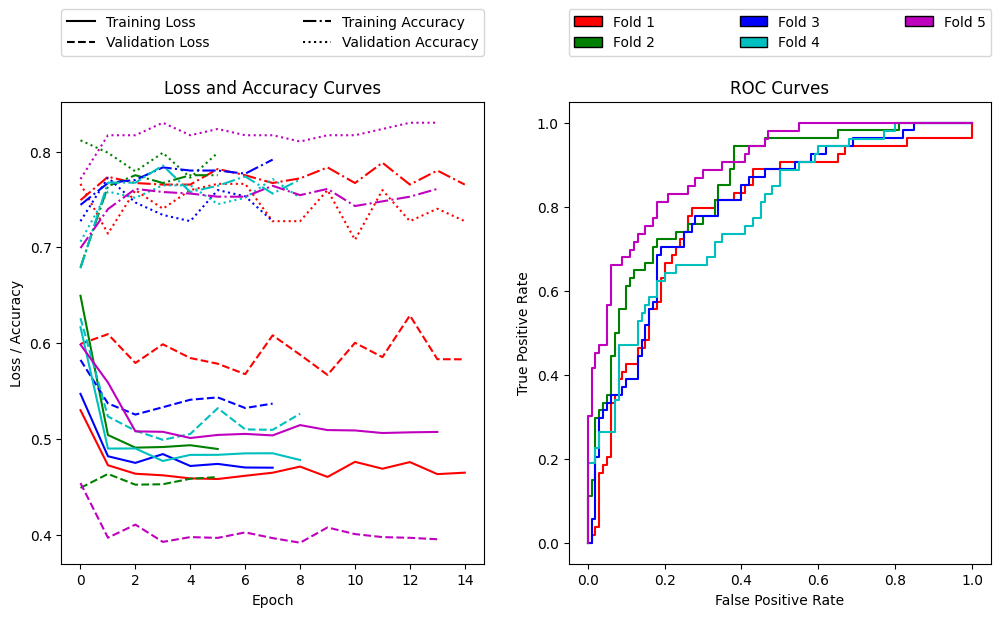

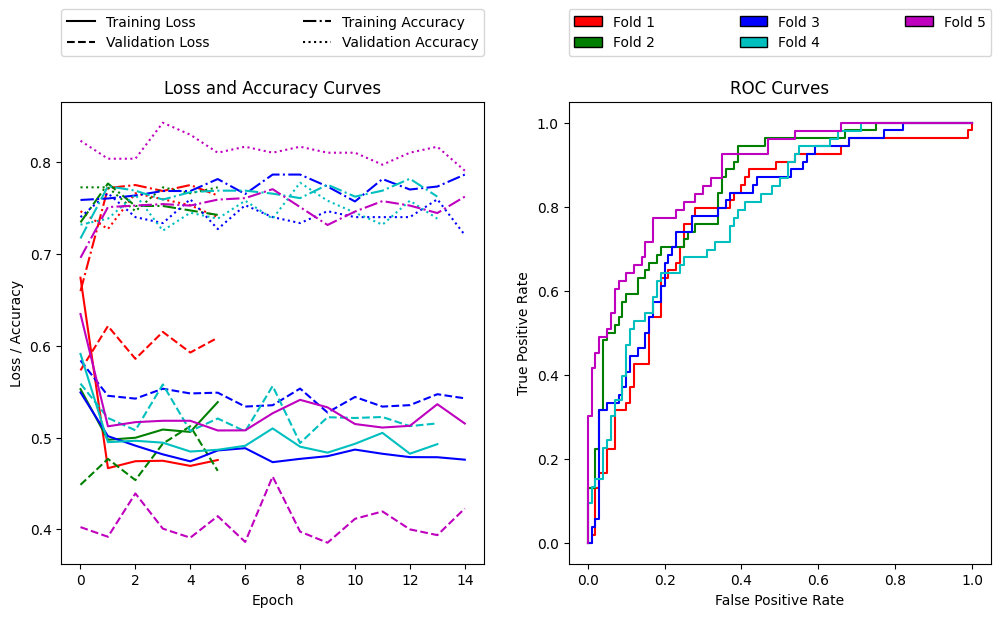

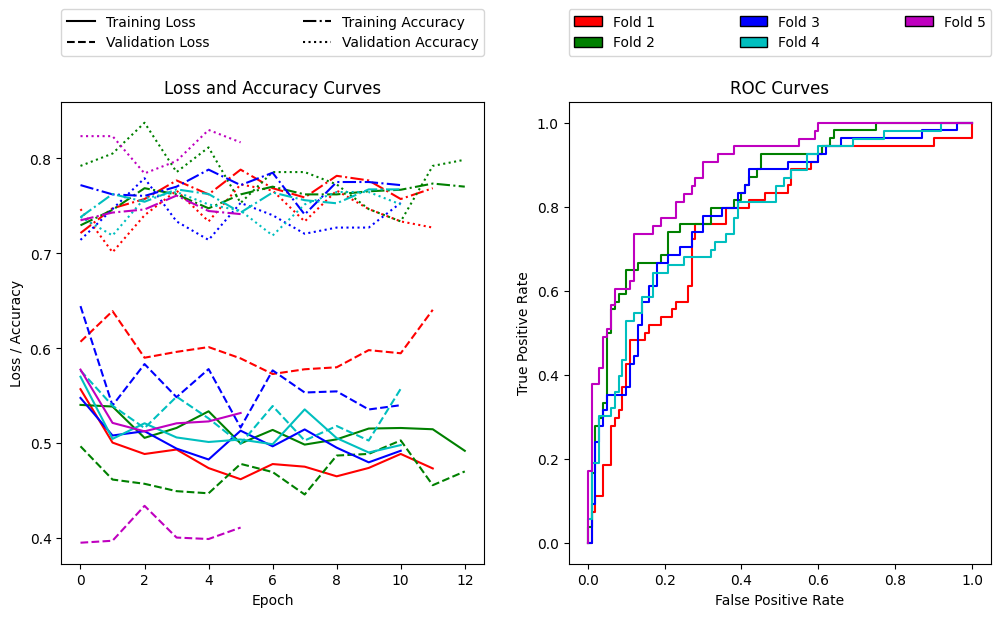

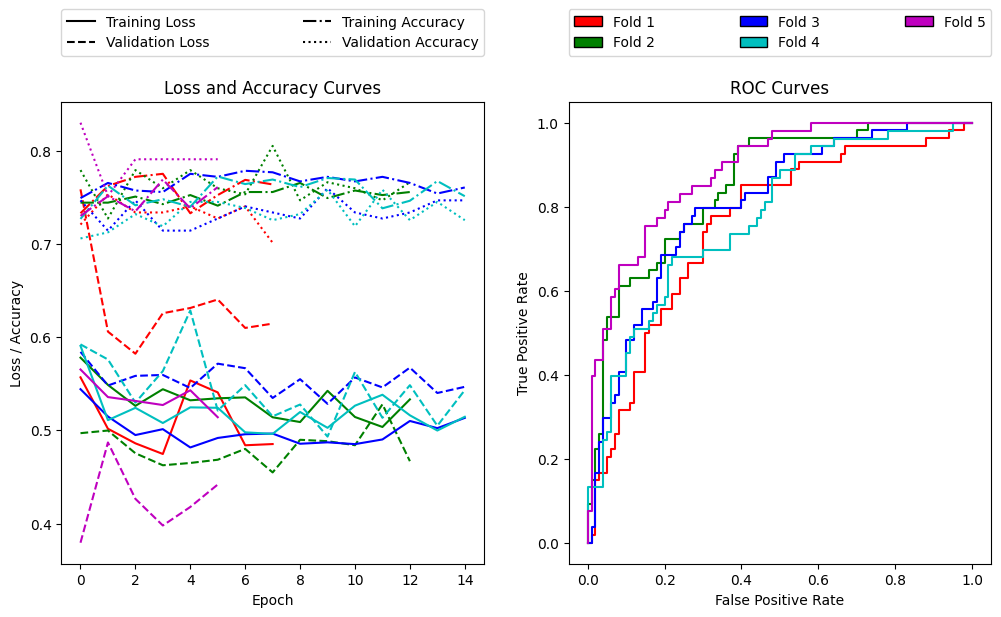

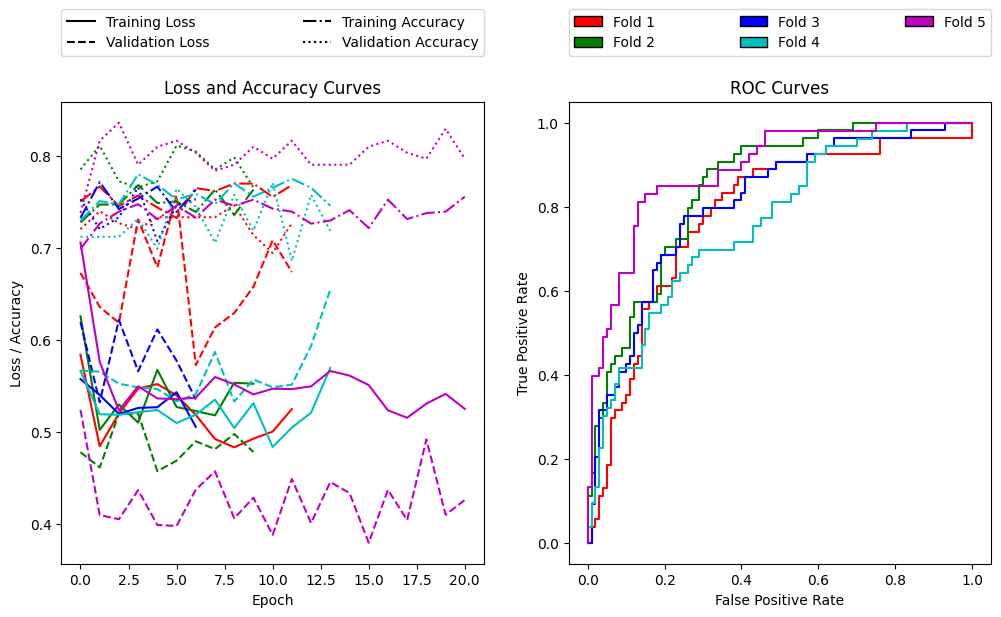

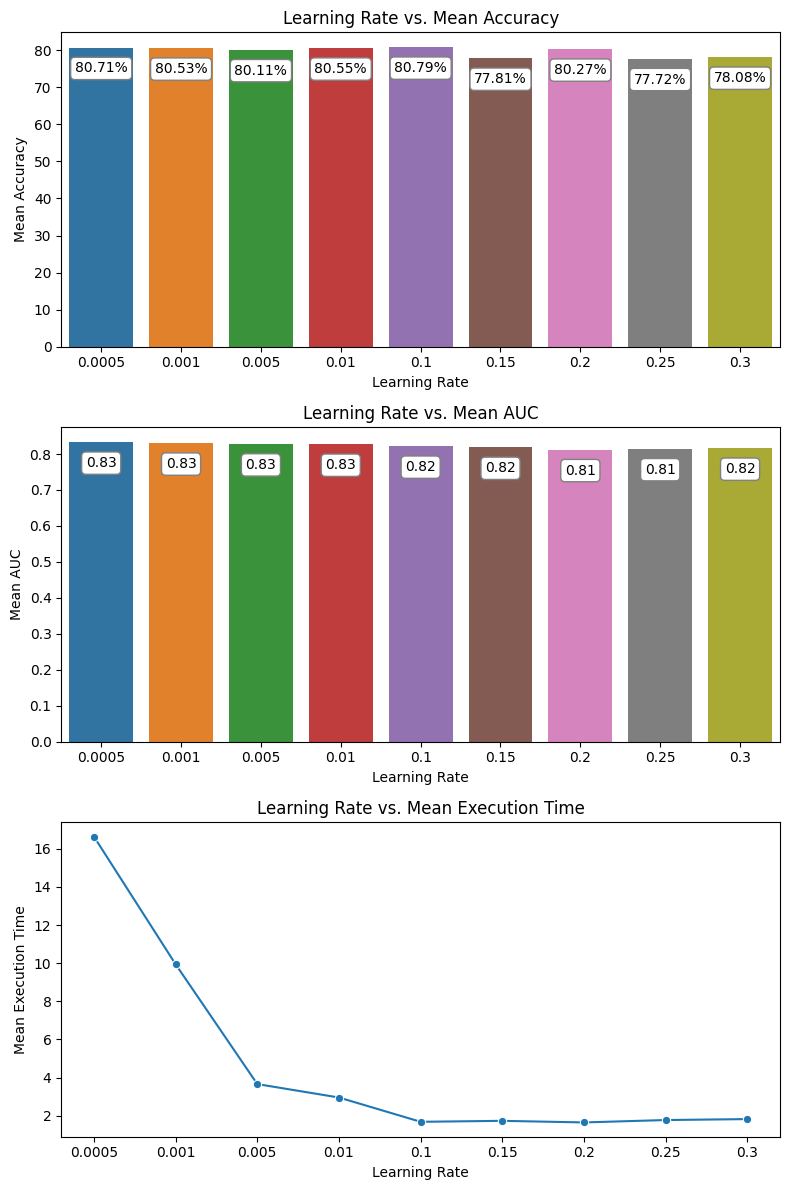

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3]
# learning_rates = [ 0.0005, 0.25, 0.3]

results = {'learning_rate': [], 'mean_accuracy': [], 'mean_auc': [], 'mean_execution_time': []}
for j in learning_rates:
    mean_accuracy, mean_auc, mean_execution_time = train_and_evaluate(X, y, learning_rate=j)
    results['learning_rate'].append(str(j))
    results['mean_accuracy'].append((mean_accuracy*100))
    results['mean_auc'].append(mean_auc)
    results['mean_execution_time'].append(mean_execution_time)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# 1st plot: Line plot for learning rate vs. mean accuracy
sns.barplot(x='learning_rate', y='mean_accuracy', data=results, ax=axs[0])
axs[0].set_xlabel('Learning Rate')
axs[0].set_ylabel('Mean Accuracy')
axs[0].set_title('Learning Rate vs. Mean Accuracy')

# Add accuracy values on top of the bars
for q in axs[0].patches:
    axs[0].annotate(format(q.get_height(), '.2f') + '%', 
                     (q.get_x() + q.get_width() / 2., q.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, -15), 
                     textcoords = 'offset points',
                     bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', linewidth=1))

# 2nd plot: Line plot for learning rate vs. mean AUC
sns.barplot(x='learning_rate', y='mean_auc', data=results, ax=axs[1])
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Mean AUC')
axs[1].set_title('Learning Rate vs. Mean AUC')
for q in axs[1].patches:
    axs[1].annotate(format(q.get_height(), '.2f'), 
                     (q.get_x() + q.get_width() / 2., q.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, -15), 
                     textcoords = 'offset points',
                     bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', linewidth=1))


# 3rd plot: Line plot for learning rate vs. mean execution time
sns.lineplot(x='learning_rate', y='mean_execution_time', data=results, marker='o', ax=axs[2])
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Mean Execution Time')
axs[2].set_title('Learning Rate vs. Mean Execution Time')


plt.tight_layout()
plt.show()

#### Implementing SLP with Keras

In [ ]:
# import tensorflow as tf
# from tensorflow import keras 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
# opt = keras.optimizers.SGD(learning_rate=0.001)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])
# loss, acc_score = model.evaluate(X_test, y_test)
# print(f"Accuracy: {acc_score:0.3f}")


Epoch 1/1000
20/20 [==============================] - 2s 34ms/step - loss: 0.9611 - accuracy: 0.4479 - val_loss: 1.0325 - val_accuracy: 0.3571
Epoch 2/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.9562 - accuracy: 0.4544 - val_loss: 1.0280 - val_accuracy: 0.3571
Epoch 3/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.9512 - accuracy: 0.4642 - val_loss: 1.0234 - val_accuracy: 0.3571
Epoch 4/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.9463 - accuracy: 0.4674 - val_loss: 1.0190 - val_accuracy: 0.3571
Epoch 5/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.9414 - accuracy: 0.4707 - val_loss: 1.0146 - val_accuracy: 0.3571
Epoch 6/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.9367 - accuracy: 0.4707 - val_loss: 1.0102 - val_accuracy: 0.3636
Epoch 7/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.9319 - accuracy: 0.4707 - val_loss: 1.0058 - val_accuracy: 0.3701
Epoc

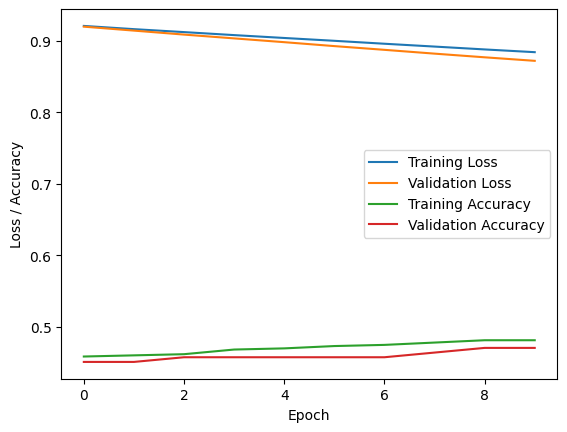

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

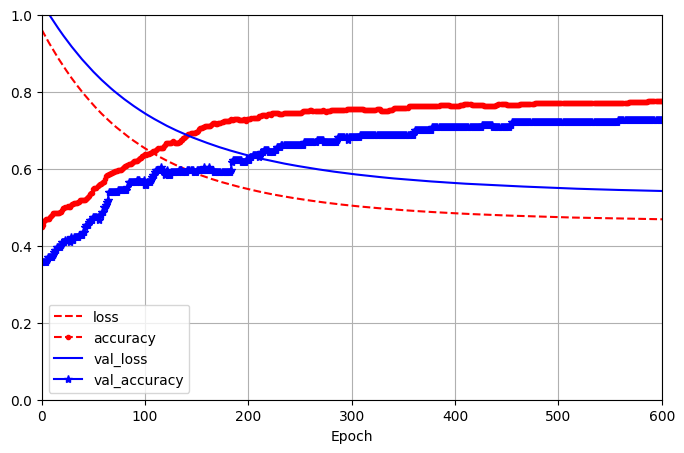

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 600], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [1]:
!pip freeze
